In [1]:
import os

os.sys.path.append(os.path.join(os.getcwd(), "../.."))

In [2]:
import matplotlib.pyplot as plt
from databases.connector import Connector
from models.ExportFormat import ExportFormat
from utils.helpers import write_roman

In [3]:
connector = Connector(ExportFormat.JSON)

In [4]:
year_count = {}

total = 0

for year in range(1980, 2025):
    questions = connector.client.aggregate_questions(
        [{"$match": {"question_date": {"$regex": f"{year}-"}}}]
    )
    questions_list = len(list(questions))
    total += questions_list
    year_count[year] = questions_list

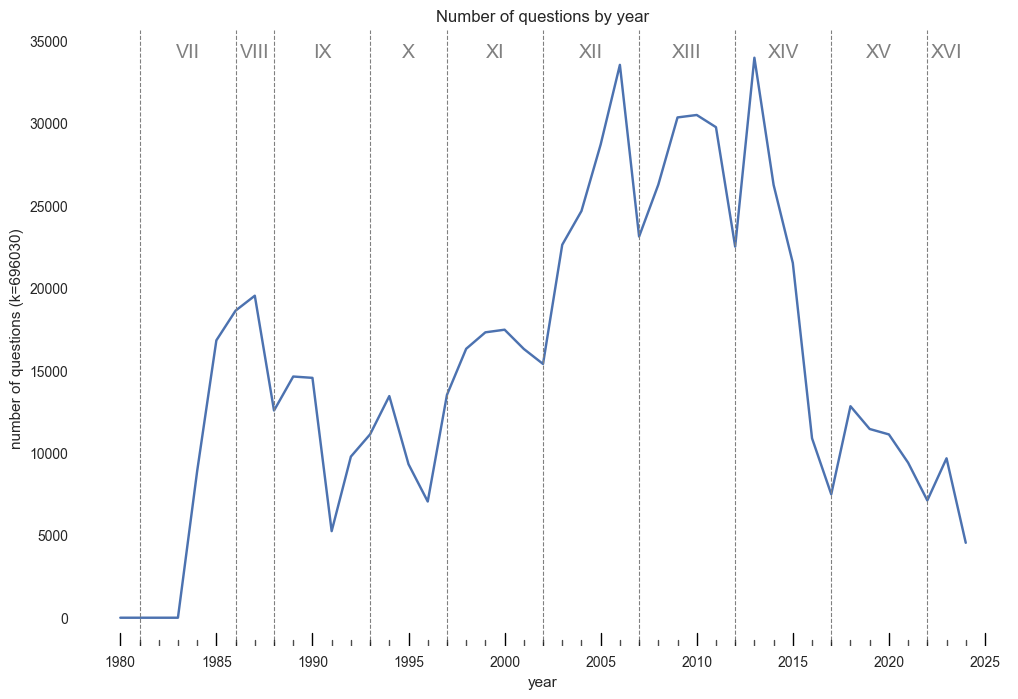

In [5]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 8))
plt.gca().set_facecolor((1.0, 1.0, 1.0))
plt.title('Number of questions by year')
plt.xlabel('year')
plt.ylabel(f'number of questions (k={total})')

plt.plot(year_count.keys(), year_count.values())

years_to_mark = [1981, 1986, 1988, 1993, 1997, 2002, 2007, 2012, 2017, 2022, 2024]
labels = [write_roman(x) for x in range(7, 17)]

for i, (year, label) in enumerate(zip(years_to_mark, labels)):
    average = (year + years_to_mark[i+1]) / 2
    plt.axvline(x=year, color='grey', linestyle='--', linewidth=0.8)
    plt.text(average, 34000, label, color='grey', fontsize=14, horizontalalignment="center")

for x in range(1980, 2026):
    if x%5 == 0:
        plt.axvline(x=x, color='black', linewidth=1, ymax=0.02)
    else:
        plt.axvline(x=x, color='black', alpha=0.7, linewidth=1, ymax=0.01)


plt.xticks([x for x in range(1980, 2026) if x%5 == 0])

plt.show()